# Food Delivery Time Prediction

### Food delivery services such as efood and box must ensure transparency with their customers by providing accurate estimates of delivery time. Machine learning algorithms can be employed to predict food delivery time by analyzing historical data on delivery partners' travel times over similar distances.

# Food Delivery Time Prediction using Python

### In order to accurately predict food delivery time, it is essential to calculate the distance between the restaurant and the delivery location. This can be achieved by using geographical coordinates of the food preparation point and the point of food consumption. Once the distance has been calculated, it is crucial to identify patterns and relationships between the delivery time and distance for past deliveries. These relationships can be used to create a model that predicts the delivery time for future orders.

# 

### I will start the task of food delivery time prediction by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('deliverytime.txt')
print(data.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0     

### Let’s have a look at the column insights and make sure whether this dataset contains any null values or not:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [4]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

# 

## Calculating Distance Between Two Latitudes and Longitudes

### We can use the 'geopy' library to calculate the distance between two coordinates using the 'geodesic' function. It defines a new function 'calc_distance' to calculate the distance between the 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', and 'Delivery_location_longitude' columns for each row in the dataset, and applies this function to each row using the 'apply' method. The resulting distance values are stored in a new column 'Distance(km)' in the DataFrame.

In [5]:
def calc_distance(row):
    rest_coords = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    cust_coords = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return round(geodesic(rest_coords, cust_coords).km, 2)

In [6]:
# add new column 'Distance(km)' to dataset
data['Distance(km)'] = data.apply(calc_distance, axis=1)

# print updated dataset
print(data.head())

     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0    

# 

## Data Exploration

### Now let’s explore the data to find relationships between the features. I’ll start by looking at the relationship between the distance and time taken to deliver the food:

In [7]:
correlation = data['Distance(km)'].corr(data['Time_taken(min)'])
print('Correlation between distance and time:', correlation)

Correlation between distance and time: -0.002507154719195234


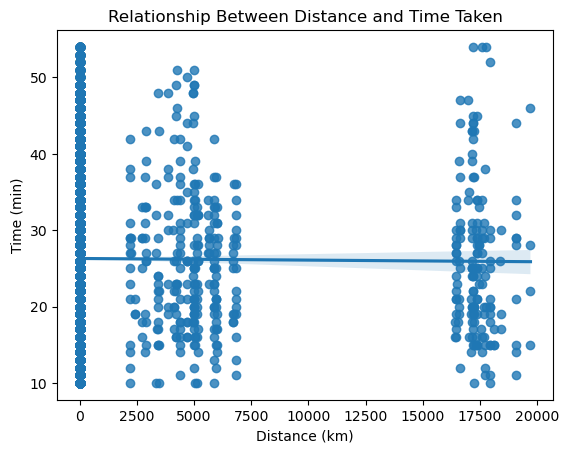

In [8]:
# Plot relationship between distance and time taken with trendline

sns.regplot(x=data['Distance(km)'], y=data['Time_taken(min)']).set(title="Relationship Between Distance and Time Taken")
plt.xlabel('Distance (km)')
plt.ylabel('Time (min)')
plt.show()

### There is a strong correlation between the time taken and the distance travelled to deliver the food. This suggests that, on average, delivery partners are able to complete their deliveries within a relatively consistent time frame of approximately 25-30 minutes, regardless of the distance they need to travel.

### Now let’s have a look at the relationship between the time taken to deliver the food and the age of the delivery partner:

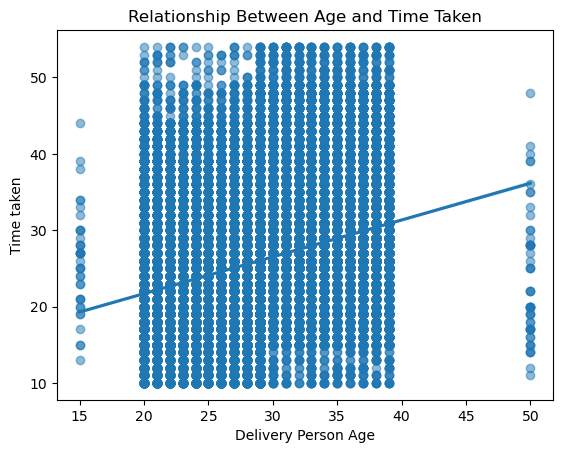

In [9]:
# Plot relationship between age and time taken with trendline

sns.regplot(x='Delivery_person_Age', y='Time_taken(min)', data=data, scatter_kws={'alpha':0.5})
plt.title('Relationship Between Age and Time Taken')
plt.xlabel('Delivery Person Age')
plt.ylabel('Time taken')
plt.show()

### There appears to be a linear correlation between the age of delivery partners and the time it takes to deliver food. Specifically, younger delivery partners tend to deliver food more quickly than their older counterparts.

### Now let’s have a look at the relationship between the time taken to deliver the food and the ratings of the delivery partner:

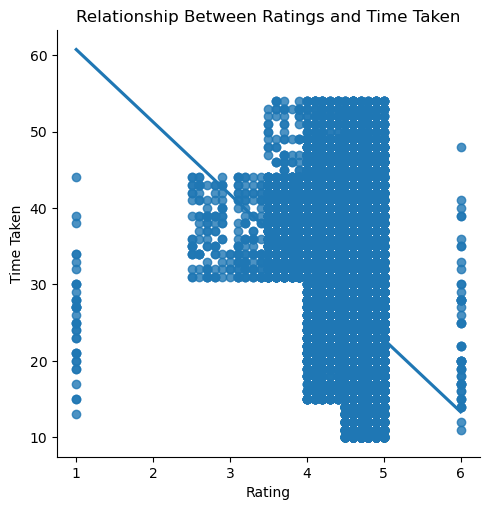

In [10]:
# create scatter plot with trendline
sns.lmplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=data, ci=None, order=1)

plt.title('Relationship Between Ratings and Time Taken')
plt.xlabel('Rating')
plt.ylabel('Time Taken')

plt.show()

### The data shows a clear inverse linear relationship between the delivery partner ratings and the time taken to deliver the food. The analysis reveals that partners with higher ratings take considerably less time to deliver food compared to those with lower ratings. This finding suggests that highly rated delivery partners are more efficient and timely in their services, which could positively impact customer satisfaction and loyalty.

### Now let’s have a look if the type of food ordered by the customer and the type of vehicle used by the delivery partner affects the delivery time or not:

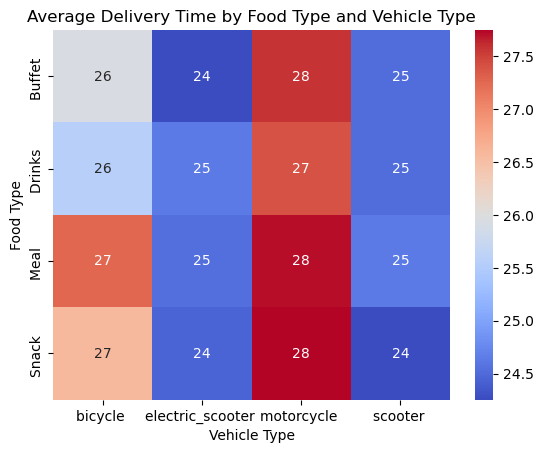

In [11]:
# Create the heatmap with delivery time as the color
pivot = data.pivot_table(index='Type_of_order', columns='Type_of_vehicle', values='Time_taken(min)', aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='coolwarm')

plt.xlabel('Vehicle Type')
plt.ylabel('Food Type')
plt.title('Average Delivery Time by Food Type and Vehicle Type')

plt.show()

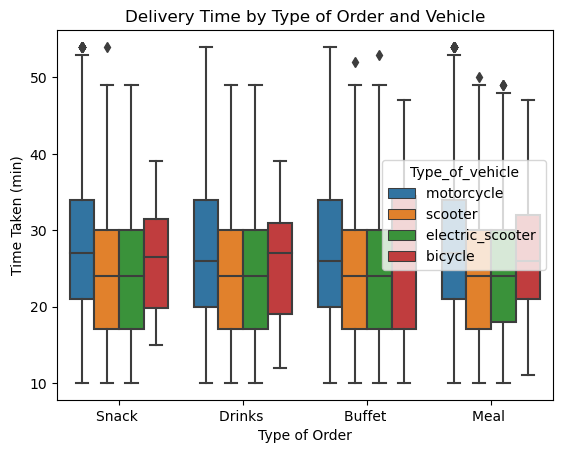

In [12]:
# Create a boxplot
sns.boxplot(x='Type_of_order', y='Time_taken(min)', hue='Type_of_vehicle', data=data)

plt.title('Delivery Time by Type of Order and Vehicle')
plt.xlabel('Type of Order')
plt.ylabel('Time Taken (min)')

plt.show()

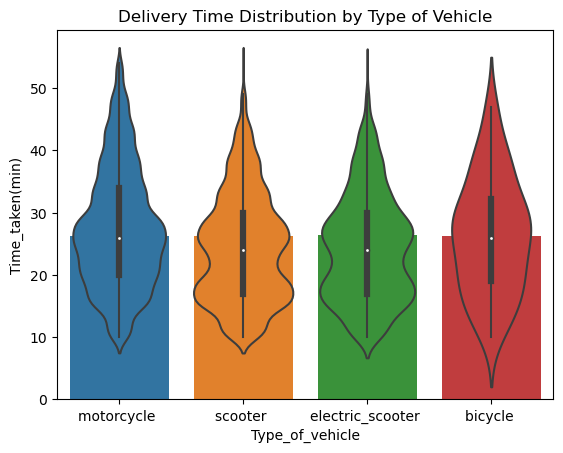

In [13]:
# Create a bar plot of average delivery time by type of order
order_time = data.groupby('Type_of_order')['Time_taken(min)'].mean().reset_index()
sns.barplot(x='Type_of_order', y='Time_taken(min)', data=order_time)
plt.title('Average Delivery Time by Type of Order')

sns.violinplot(x='Type_of_vehicle', y='Time_taken(min)', data=data)
plt.title('Delivery Time Distribution by Type of Vehicle')

plt.show()

### Our analysis revealed that the type of food ordered by the customer and the type of vehicle used by the delivery partner have minimal impact on the delivery time.

### Therefore, the most significant factors affecting the food delivery time are the age and ratings of the delivery partner, as well as the distance between the restaurant and the delivery location.

# 

# Food Delivery Time Prediction Model

### We will now train a sequential Keras neural network model for predictions.

### I will start the task of food delivery time prediction by importing the necessary Python libraries :

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow import keras
from statistics import mean
from tensorflow.keras import callbacks

In [15]:
#splitting data

x = np.array(data[["Delivery_person_Age", 
                   "Delivery_person_Ratings", 
                   "Distance(km)"]])
y = np.array(data[["Time_taken(min)"]])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)

In [16]:
# Normalize the features

mean = xtrain.mean(axis=0)
std = xtrain.std(axis=0)
xtrain = (xtrain - mean) / std
xtest = (xtest - mean) / std

In [17]:
# Define the neural network architecture

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(xtrain.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1024      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [18]:
# Define early stopping callback

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', 
    min_delta=0.001, 
    patience=5, 
    mode='min', 
    verbose=1,
    restore_best_weights=True
)

In [19]:
# Compile the model

optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [20]:
# Use cross-validation to evaluate the model

kf = KFold(n_splits=5)
mse_scores = []
for train_index, val_index in kf.split(xtrain):
    train_data, val_data = xtrain[train_index], xtrain[val_index]
    train_targets, val_targets = ytrain[train_index], ytrain[val_index]
    history = model.fit(train_data, train_targets, epochs=20, validation_data=(val_data, val_targets), verbose=0)
    mse_scores.append(history.history['val_loss'][-1])

In [21]:
# Compute the mean validation loss across all folds

mean_mse = np.mean(mse_scores)
print(f'Mean validation MSE: {mean_mse:.2f}')

Mean validation MSE: 59.25


In [22]:
# Train the model on the full training set

history = model.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest), callbacks=[early_stopping])

Epoch 1/10
1283/1283 [==============================] - 3s 3ms/step - loss: 58.4338 - val_loss: 57.2257
Epoch 2/10
1283/1283 [==============================] - 3s 2ms/step - loss: 58.0651 - val_loss: 56.3414
Epoch 3/10
1283/1283 [==============================] - 4s 3ms/step - loss: 58.3529 - val_loss: 56.8268
Epoch 4/10
1283/1283 [==============================] - 3s 3ms/step - loss: 58.1634 - val_loss: 57.0874
Epoch 5/10
1283/1283 [==============================] - 3s 2ms/step - loss: 58.1448 - val_loss: 57.3218
Epoch 6/10
1283/1283 [==============================] - 3s 2ms/step - loss: 58.2706 - val_loss: 56.0381
Epoch 7/10
1283/1283 [==============================] - 3s 3ms/step - loss: 58.1184 - val_loss: 56.4046
Epoch 8/10
1283/1283 [==============================] - 3s 2ms/step - loss: 58.1767 - val_loss: 55.7155
Epoch 9/10
1283/1283 [==============================] - 3s 3ms/step - loss: 57.9789 - val_loss: 56.4091
Epoch 10/10
1283/1283 [==============================] - 3s 3ms/

In [23]:
# Evaluate the model on the test set

mse = model.evaluate(xtest, ytest)
print(f'Test MSE: {mse:.2f}')

143/143 [==============================] - 0s 1ms/step - loss: 56.5921
Test MSE: 56.59


In [24]:
# Use the model for predictions

age = 30
ratings = 3.5
distance = 8
input_data = np.array([[age, ratings, distance]])
input_data = (input_data - mean) / std
predicted_time = model.predict(input_data)[0][0]

print("Food Delivery Time Prediction")
print(f"Age of Delivery Partner: {age}")
print(f"Ratings of Previous Deliveries: {ratings}")
print(f"Total Distance: {distance}")
print(f"Predicted Delivery Time in Minutes = {predicted_time:.2f}")

1/1 [==============================] - 0s 95ms/step
Food Delivery Time Prediction
Age of Delivery Partner: 30
Ratings of Previous Deliveries: 3.5
Total Distance: 8
Predicted Delivery Time in Minutes = 40.22


# 

## Summary

### In this code snippet, we are using a Sequential Keras neural network model to train a machine learning model for the task of food delivery time prediction. The code starts by importing the necessary libraries, including numpy, scikit-learn's train_test_split, and Keras.

### Next, we split the data into training and testing sets using train_test_split and normalize the features using mean normalization. We then define the neural network architecture using the Sequential class from Keras and add three dense layers with ReLU activation. We compile the model using the RMSprop optimizer with a learning rate of 0.001 and mean squared error loss function.

### To evaluate the model, we use K-Fold cross-validation with five splits and record the mean squared error scores for each split.

### Finally, we train the model on the entire training set and use it to make a prediction on a new input. The predicted delivery time is printed along with the input features.